In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from warnings import filterwarnings
filterwarnings('ignore')

In [55]:
training = pd.read_csv('bigmart_train.csv')

In [56]:
training.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [57]:
training.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [58]:
training['Outlet_Age'] = 2022-training['Outlet_Establishment_Year']
training.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,24
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35


In [59]:
training['Outlet_Size'].mode()[0]

'Medium'

In [60]:
training['Outlet_Size'] = training['Outlet_Size'].fillna(training['Outlet_Size'].mode()[0])

In [61]:
training['Item_Weight'] = training['Item_Weight'].fillna(training['Item_Weight'].mean())

In [62]:
training.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Age                   0
dtype: int64

<AxesSubplot:>

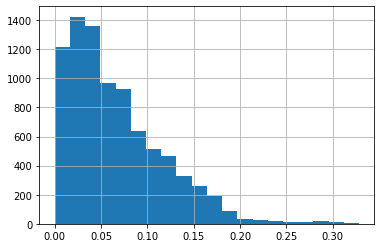

In [63]:
training['Item_Visibility'].hist(bins=20)

In [64]:
Q1 = training['Item_Visibility'].quantile(0.25)
Q3 = training['Item_Visibility'].quantile(0.75)

IQR = Q3 - Q1

fil_trail = training.query('(@Q1-1.5*@IQR) <= Item_Visibility <= (@Q3 + 1.5*@IQR)')
fil_trail.shape, training.shape

((8379, 13), (8523, 13))

In [65]:
training = fil_trail
training.shape

(8379, 13)

In [66]:
training['Item_Visibility_Bins'] = pd.cut(training['Item_Visibility'], [0.000, 0.065, 0.13, 0.2],
                                         labels=['Low Viz', 'Viz', 'High Viz'])

In [67]:
training['Item_Visibility_Bins'] = training['Item_Visibility_Bins'].replace(np.nan, 'Low Viz')

In [68]:
training['Item_Visibility_Bins'].unique()

['Low Viz', NaN, 'Viz', 'High Viz']
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [69]:
training['Item_Fat_Content'] = training['Item_Fat_Content'].replace(['Low fat', 'LF'], 'Low fat')
training['Item_Fat_Content'] = training['Item_Fat_Content'].replace('reg', 'Regular')

In [70]:
training.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_Bins
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,23,Low Viz
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,13,Low Viz
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,23,Low Viz
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,24,NaN
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,35,NaN


In [71]:
training['Item_Visibility_Bins'].fillna(value='Low Viz', inplace=True)

In [72]:
training['Item_Visibility_Bins'].unique()

['Low Viz', 'Viz', 'High Viz']
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [73]:
training.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Age                   0
Item_Visibility_Bins         0
dtype: int64

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [75]:
training['Item_Fat_Content'] = training['Item_Fat_Content'].replace(['Low Fat', 'low fat', 'Low fat'], 'Low Fat', regex=True)
training['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [76]:
training['Item_Fat_Content'] = le.fit_transform(training['Item_Fat_Content'])
training['Item_Visibility_Bins'] = le.fit_transform(training['Item_Visibility_Bins'])
training['Outlet_Size'] = le.fit_transform(training['Outlet_Size'])
training['Outlet_Location_Type'] = le.fit_transform(training['Outlet_Location_Type'])

In [77]:
training.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_Bins
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,23,1
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,13,1
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,23,1
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,24,1
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,35,1


In [79]:
dummies = pd.get_dummies(training['Outlet_Type'])
dummies.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [80]:
training = pd.concat([training, dummies], axis=1)

In [81]:
training.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_Bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,23,1,0,1,0,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,13,1,0,0,1,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,23,1,0,1,0,0
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,24,1,1,0,0,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,35,1,0,1,0,0


In [83]:
training = training.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type',
                            'Outlet_Establishment_Year'], axis = 1)

In [84]:
training.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Visibility_Bins,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,23,1,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,13,1,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,23,1,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,24,1,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,35,1,0,1,0,0


In [85]:
X = training.drop('Item_Outlet_Sales', axis=1)
y = training.Item_Outlet_Sales

In [87]:
test = pd.read_csv('bigmart_test.csv')

In [88]:
test['Outlet_Size']=test['Outlet_Size'].fillna('Medium')

In [95]:
#test = test.drop('Item_Visibility_Bins', axis=1)
test['Item_Visibility_Bins'] = pd.cut(test['Item_Visibility'],[0.000, 0.065, 0.13, 0.2], labels=['Low Viz', 'Viz', 'High Viz'])

In [96]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Visibility_Bins
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Low Viz
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,Low Viz
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,Viz
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,Low Viz
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,Viz


In [97]:
test['Item_Visibility_Bins'].fillna(value='Low Viz', inplace=True)

In [98]:
test['Item_Visibility_Bins'].unique()

['Low Viz', 'Viz', 'High Viz']
Categories (3, object): ['Low Viz' < 'Viz' < 'High Viz']

In [99]:
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [100]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [101]:
test['Item_Fat_Content']=test['Item_Fat_Content'].replace(['Low Fat', 'LF', 'low fat'], 'Low Fat', regex=True)
test['Item_Fat_Content']=test['Item_Fat_Content'].replace('reg', 'Regular', regex=True)

In [102]:
test['Item_Fat_Content'] = le.fit_transform(test['Item_Fat_Content'])
test['Item_Visibility_Bins'] = le.fit_transform(test['Item_Visibility_Bins'])
test['Outlet_Size'] = le.fit_transform(test['Outlet_Size'])
test['Outlet_Location_Type'] = le.fit_transform(test['Outlet_Location_Type'])

In [103]:
test['Outlet_Age']= le.fit_transform(test['Outlet_Establishment_Year'])

In [106]:
dummy = pd.get_dummies(test['Outlet_Type'])
test = pd.concat([test,dummy], axis=1)

In [107]:
X_test = test.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type',
                            'Outlet_Establishment_Year'], axis = 1)

In [108]:
from sklearn.linear_model import LinearRegression
Lin = LinearRegression()

In [109]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [110]:
Lin.fit(xtrain,ytrain)

LinearRegression()

In [111]:
print(Lin.coef_)
print(Lin.intercept_)

[    3.32565903    27.49948402  -196.15278716    15.96531149
    16.76148752     8.04121542    -2.28120926    17.62300318
 -1753.70556394   219.18652367  -122.33893469  1656.85797495]
-184.41205288628043


In [113]:
predictions = Lin.predict(xtest)
print(np.sqrt(mean_squared_error(ytest, predictions)))
print(r2_score(ytest, predictions))

1118.41605258575
0.5486140031569207


In [115]:
from sklearn.linear_model import Ridge
Ridgereg = Ridge(alpha=0.001, normalize=True)

Ridgereg.fit(xtrain, ytrain)

print(np.sqrt(mean_squared_error(ytest, Ridgereg.predict(xtest))))
print(np.sqrt(mean_squared_error(ytrain,Ridgereg.predict(xtrain))))
Ridgereg.score(xtest,ytest)


1118.3593685856831
1139.5277714448032


0.5486597566409251

In [116]:
from sklearn.linear_model import Lasso
Lassoreg = Lasso(alpha=0.001, normalize=True)

Lassoreg.fit(xtrain, ytrain)

print(np.sqrt(mean_squared_error(ytest, Lassoreg.predict(xtest))))
print(np.sqrt(mean_squared_error(ytrain,Lassoreg.predict(xtrain))))
Lassoreg.score(xtest,ytest)


1118.409534783899
1139.5271102348174


0.548619264232897

In [117]:
from sklearn.linear_model import ElasticNet
Elreg = ElasticNet(alpha=0.001, normalize=True)

Elreg.fit(xtrain, ytrain)

print(np.sqrt(mean_squared_error(ytest, Elreg.predict(xtest))))
print(np.sqrt(mean_squared_error(ytrain,Elreg.predict(xtrain))))
Elreg.score(xtest,ytest)


1429.1476301155997
1477.9201935157498


0.2629524867556169